In [7]:
import numpy as np
import torch
from torch import nn
import torchvision

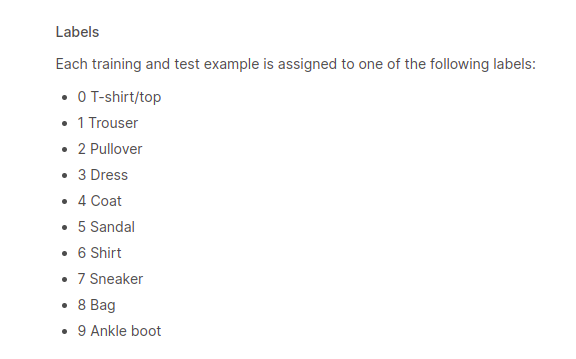

In [2]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [3]:
print(len(trainingdata))
print(len(testdata))

60000
10000


In [4]:
image, label = trainingdata[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


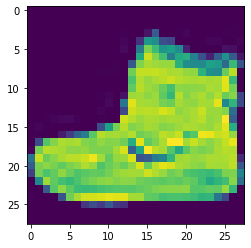

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze().numpy())
plt.show()

In [15]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)
n_features = 28 * 28

In [22]:
class Classification(torch.nn.Module):
  def __init__(self, n_features, hiddenA, hiddenB):
    super(Classification, self).__init__()
    self.linearA = nn.Linear(n_features, hiddenA)
    self.linearB = nn.Linear(hiddenA, hiddenB)
    self.linearC = nn.Linear(hiddenB, 10) #10 is number of outputs
    self.relu1 = nn.ReLU()
    self.softmax = torch.nn.Softmax() #defining softmax

  def forward(self, x):
    x = x.view(-1,28*28)
    y_pred = self.linearA(x)
    y_pred = self.relu1(y_pred)
    y_pred = self.linearB(y_pred)
    y_pred = self.relu1(y_pred) #add relu after each hidden layer
    y_pred = self.linearC(y_pred)
    y_pred = self.softmax(y_pred) #softmax at the end
    return y_pred

In [27]:
net = Classification(n_features, 100, 50)
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001) #final loss: 1.6812753357104402 when lr = 0.01
train_loss_history = []
test_loss_history = []

for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    optimizer.zero_grad()
    predicted_output = net(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  train_loss_history.append(train_loss)
  print('Epoch %s, Train loss %s'%(epoch, train_loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0, Train loss 2.3013614868558547
Epoch 1, Train loss 2.300214234445649
Epoch 2, Train loss 2.299004268036214
Epoch 3, Train loss 2.297734241241585
Epoch 4, Train loss 2.2963749899793027
Epoch 5, Train loss 2.2949061663166037
Epoch 6, Train loss 2.2932901522243965
Epoch 7, Train loss 2.2914836871852753
Epoch 8, Train loss 2.289456290476866
Epoch 9, Train loss 2.2871537272101525
Epoch 10, Train loss 2.2845440126939622
Epoch 11, Train loss 2.281568266943828
Epoch 12, Train loss 2.278172819344982
Epoch 13, Train loss 2.2743165027866485
Epoch 14, Train loss 2.2699276262254857
Epoch 15, Train loss 2.264918407905839
Epoch 16, Train loss 2.2591027949156284
Epoch 17, Train loss 2.2520950160809416
Epoch 18, Train loss 2.2431019692024443
Epoch 19, Train loss 2.2308517102239485


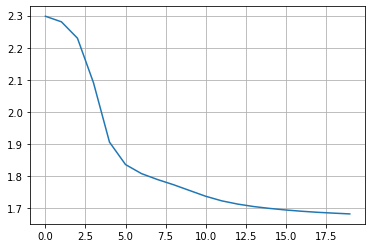

In [26]:
plt.plot(train_loss_history)
plt.grid(True)

In [ ]:
images, labels = iter(trainDataLoader).next()
print(labels.shape)

torch.Size([64])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


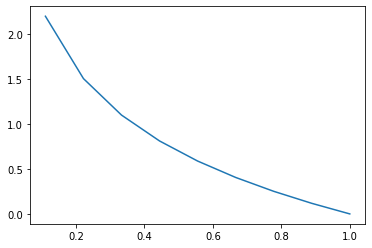

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 10)
y = -np.log(x)
plt.plot(x, y)
plt.show()